In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# 📌 **步骤 1：读取 60 只股票的权重**
# 读取最优投资组合的 60 只股票
portfolio_file = "optimal_portfolio_top60.csv"
portfolio_df = pd.read_csv(portfolio_file)

# 获取股票列表和对应的权重
selected_stocks = portfolio_df['Stock'].tolist()
stock_weights = portfolio_df.set_index('Stock')['Weight'].to_dict()

# 设定数据存放的文件夹路径
data_directory = "SP500_21_25"


In [2]:
# 📌 **步骤 2：读取收盘价数据**
# 创建 DataFrame 存储所有股票的收盘价
price_data = pd.DataFrame()

for ticker in selected_stocks:
    file_path = os.path.join(data_directory, f"{ticker}.csv")
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # 处理日期列，并确保数据按时间排序
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
        
        # 仅保留 Close 价格
        price_data[ticker] = df['Close']
    else:
        print(f"⚠️ 文件未找到：{ticker}")

# 确保按日期排序
price_data.sort_index(inplace=True)


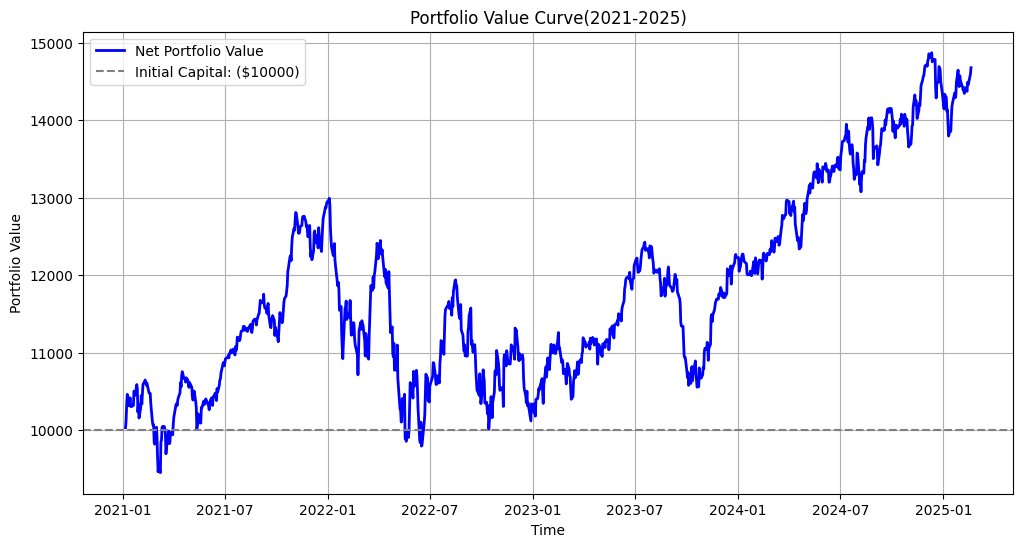

✅ 投资组合收益曲线已计算完成，并保存为 'portfolio_value_2021_2025.csv'


In [3]:
# 📌 **步骤 3：计算每日收益率**
# 计算简单收益率（percentage return）
returns = price_data.pct_change().dropna()

# 📌 **步骤 4：计算投资组合的每日收益**
# 计算投资组合每日收益率
portfolio_returns = returns.dot(pd.Series(stock_weights))

# 设定初始资金
initial_capital = 10000

# 计算投资组合的累积净值曲线
portfolio_value = (1 + portfolio_returns).cumprod() * initial_capital

# 📌 **步骤 5：绘制投资组合的收益曲线**
plt.figure(figsize=(12, 6))
plt.plot(portfolio_value, label="Net Portfolio Value", color='b', linewidth=2)
plt.axhline(y=initial_capital, color='gray', linestyle='--', label="Initial Capital: ($10000)")
plt.xlabel("Time")
plt.ylabel("Portfolio Value")
plt.title("Portfolio Value Curve(2021-2025)")
plt.legend()
plt.grid(True)
plt.show()

# **可选：保存结果**
portfolio_value.to_csv("portfolio_value_2021_2025.csv")
print("✅ 投资组合收益曲线已计算完成，并保存为 'portfolio_value_2021_2025.csv'")
